# 載入必要庫

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 載入資料

In [2]:
df = pd.read_csv('/content/drive/MyDrive/中興_人工智慧/hiroshima_challengedata.csv')  # 替換為你的檔案名稱

# 簡單顯示

In [3]:
# 顯示前幾行
print("資料前 5 行：")
print(df.head())

# 若資料集過大，顯示總數資訊
print("\n資料集大小：", df.shape)

資料前 5 行：
   uid  d   t   x    y
0    0  0  20  80   99
1    0  0  21  81   97
2    0  0  25  83  102
3    0  0  26  80  101
4    0  0  27  80  101

資料集大小： (24375898, 5)


In [4]:
print(df.tail())

            uid   d   t    x    y
24375893  24999  74  36  999  999
24375894  24999  74  37  999  999
24375895  24999  74  39  999  999
24375896  24999  74  43  999  999
24375897  24999  74  47  999  999


In [16]:
print(df['x'])

0            80
1            81
2            83
3            80
4            80
           ... 
24375893    999
24375894    999
24375895    999
24375896    999
24375897    999
Name: x, Length: 24375898, dtype: int64


# 區塊統計

In [6]:
# 按照區塊分組，忽略 uid
grouped = df.groupby(['x', 'y']).size().reset_index(name='count')

In [21]:
group_sort = grouped.sort_values(by=['count'])
group_sort.tail(10)

,x,y,count
11705,79,95,57023
11383,77,92,59415
11704,79,94,73527
11703,79,93,95639
11702,79,92,95707
11878,80,96,108064
11875,80,93,113517
11874,80,92,118145
11877,80,95,122068
26523,999,999,462816


In [20]:
group_sort.head(10)

,x,y,count
17456,120,70,1
4608,34,158,1
9806,67,80,1
6368,45,175,1
9795,67,68,1
24827,181,176,1
2794,21,91,1
17627,121,169,1
6372,45,180,1
4604,34,153,1


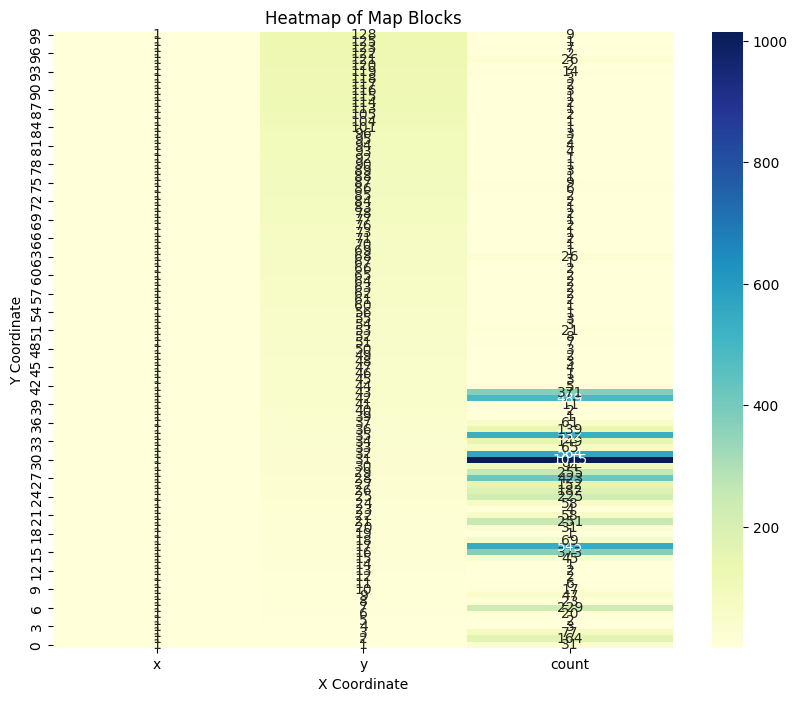

In [10]:
# 取前100筆資料
grouped_100 = grouped.head(100)

# 繪製熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_100, cmap="YlGnBu", annot=True, fmt=".0f", cbar=True)

# 設置標籤
plt.title('Heatmap of Map Blocks')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [ ]:
import seaborn as sns
cols_data = ["Total","Coal","Oil","Gas","Cement","Flaring"]
continuous_labels = original_trend_dict['Global'][cols_data]

corr_matrix = continuous_labels.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Global emissions from 1960 to 2021)')
plt.yticks(rotation=0)
plt.show()

In [11]:
# 使用 pivot_table 根據 x 和 y 生成 count 矩陣
pivot_matrix = grouped_100.pivot_table(index='x', columns='y', values='count', fill_value=0)
pivot_matrix

y,1,2,3,4,5,6,7,8,9,10,...,116,117,118,119,120,121,122,123,125,128
x,,,,,,,,,,,,,,,,,,,,,
1,31.0,164.0,77.0,3.0,2.0,20.0,229.0,23.0,47.0,17.0,...,3.0,2.0,3.0,14.0,2.0,26.0,2.0,7.0,1.0,9.0
